## Chirp Signal Example
For a signal defined as $x(t)  = cos(\phi(t))$,  instantaneous angular frequency, ω, is defined as the phase rate as given by the first derivative of phase, with the instantaneous ordinary frequency, f, being its normalized version: $w(t) = \frac{d\phi(t)}{dt}, f(t)=\frac{w(t)}{2\pi}$

In a linear-frequency chirp or simply linear chirp, the instantaneous frequency $f ( t )$ varies exactly linearly with time: $f ( t ) = ct + f_0$ 

where $f_0$ is the starting frequency at time t = 0, and c is the chirpyness, assumed constant: 
Hence, $\phi(t) = \phi_0 + \int_{0}^{t}(ct + f_0)d\tau = \phi_0 + ct^2/2 + f_0 t$

Reference : https://en.wikipedia.org/wiki/Chirp

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
from scipy import interpolate

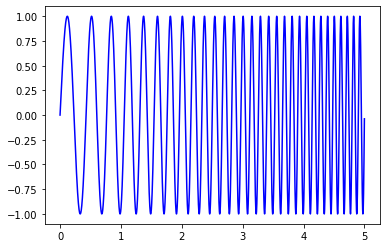

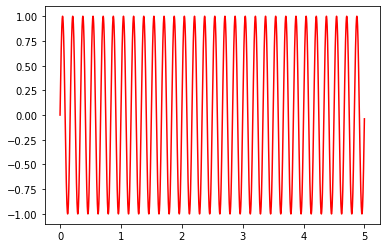

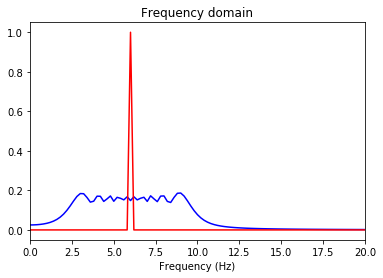

In [6]:
## Frequency nonstationarities
srate = 1000
t = np.arange(0,5,1/srate)
n = len(t)

f  = [2, 10]
c = np.diff(f) / (t[-1] - t[0])
phi_t = (c/2) * t **2 + f[0]*t
#ff = np.linspace(f[0], f[1],n)
signal1 = np.sin(2*np.pi*phi_t)
signal2 = np.sin(2*np.pi*np.mean(f)*t)

# compute FFTs
signal1X = scipy.fftpack.fft(signal1)/n
signal2X = scipy.fftpack.fft(signal2)/n
hz = np.linspace(0,srate/2,n//2+1)

plt.plot(t,signal1,'b')
plt.show()
plt.plot(t,signal2,'r')
plt.show()
plt.title('Time domain')

plt.plot(hz,2*np.abs(signal1X[0:len(hz)]),'b')
plt.plot(hz,2*np.abs(signal2X[0:len(hz)]),'r')
plt.xlabel('Frequency (Hz)')
plt.title('Frequency domain')
plt.xlim([0,20])
plt.show()